,Time (s),Extensometer (mm),Load (kN),Engineering strain (abs.),Engineering stress (MPa)
0,0.00000,0.000000,0.112273,0.000000e+00,4.777782
1,0.02000,0.000012,0.112240,7.830700e-07,4.776365
2,0.04000,0.000022,0.112252,1.444391e-06,4.776884
3,0.06000,0.000031,0.112241,2.078162e-06,4.776408
4,0.08000,0.000039,0.112215,2.570288e-06,4.775297
...,...,...,...,...,...
808,16.16000,0.015007,6.983419,1.000435e-03,297.179412
809,16.18000,0.015022,6.979941,1.001433e-03,297.031406
810,16.20000,0.015036,6.976616,1.002417e-03,296.889910
811,16.22000,0.015051,6.973427,1.003399e-03,296.754202


,Time (s),Extensometer (mm),Load (kN),Engineering strain (abs.),Engineering stress (MPa)
0,0.00,0.000000,0.111985,0.000000e+00,4.765535
1,0.02,-0.000003,0.111974,-2.087903e-07,4.765054
2,0.04,-0.000006,0.111980,-4.175806e-07,4.765326
3,0.06,-0.000007,0.112027,-4.841099e-07,4.767305
4,0.08,-0.000006,0.112025,-3.719250e-07,4.767211
...,...,...,...,...,...
1169,23.38,0.030828,7.637572,2.055169e-03,325.016894
1170,23.40,0.030841,7.637185,2.056052e-03,325.000426
1171,23.42,0.030857,7.636778,2.057150e-03,324.983106
1172,23.44,0.030878,7.636359,2.058513e-03,324.965275


,Time (s),Extensometer (mm),Load (kN),Engineering strain (abs.),Engineering stress (MPa)
0,0.00000,0.000000e+00,0.111302,0.000000e+00,4.736474
1,0.02000,4.783050e-08,0.111279,3.188700e-09,4.735474
2,0.04000,3.311396e-07,0.111309,2.207597e-08,4.736733
3,0.06000,1.503843e-06,0.111301,1.002562e-07,4.736427
4,0.08000,4.912372e-06,0.111312,3.274915e-07,4.736904
...,...,...,...,...,...
1023,20.46000,5.658595e-02,8.479340,3.772397e-03,360.838334
1024,20.48000,5.678989e-02,8.466513,3.785993e-03,360.292481
1025,20.50000,5.699383e-02,8.451873,3.799589e-03,359.669475
1026,20.52000,5.719777e-02,8.437471,3.813185e-03,359.056598


,Time (s),Extensometer (mm),Load (kN),Engineering strain (abs.),Engineering stress (MPa)
0,0.00000,0.000000,0.111316,0.000000e+00,4.737036
1,0.02000,0.000006,0.111272,3.749649e-07,4.735184
2,0.04000,0.000011,0.111243,7.499300e-07,4.733959
3,0.06000,0.000017,0.111224,1.124895e-06,4.733121
4,0.08000,0.000022,0.111241,1.482820e-06,4.733857
...,...,...,...,...,...
1254,25.08000,0.097125,8.949374,6.475031e-03,380.840632
1255,25.10000,0.097152,8.929627,6.476815e-03,380.000298
1256,25.12000,0.097125,8.910524,6.475018e-03,379.187370
1257,25.14000,0.097098,8.892907,6.473222e-03,378.437678


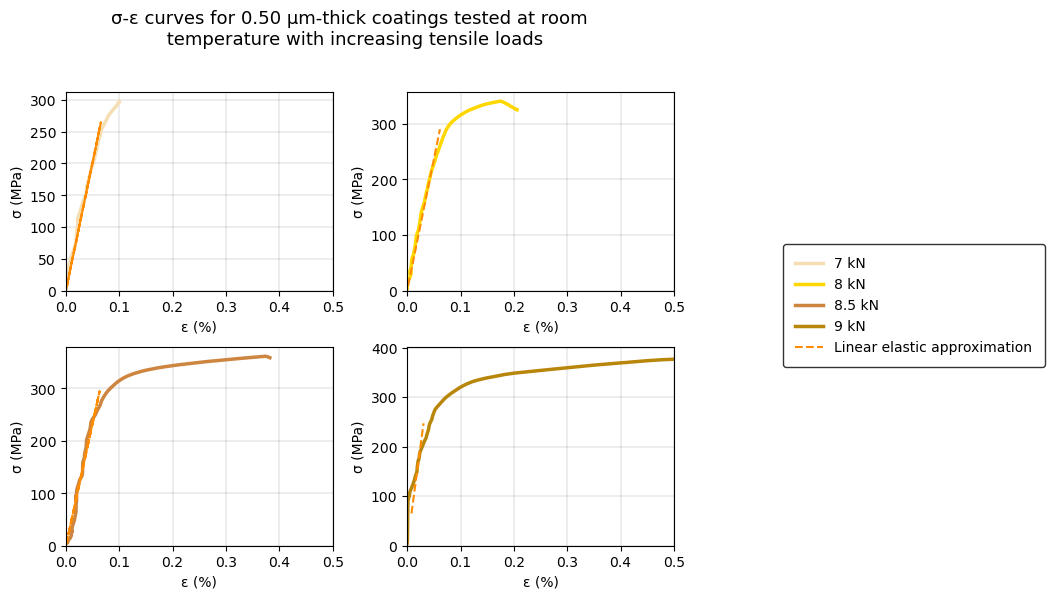

,Load (kN),R² value,Linear regression reliability,Approximate incremental modulus (GPa)
0,7,0.984558,VERY GOOD,403
1,8,0.983680,VERY GOOD,472
2,8.5,0.968531,VERY GOOD,466
3,9,0.369303,NOT GOOD,804


In [22]:
#---------------------------------------------|| PHYTON CLASSES AND LIBRARIES ||---------------------------------------------#

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import colorama, statistics
from scipy.interpolate import griddata
from scipy.interpolate import interp1d
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from colorama import Fore, Style, Back
from statistics import mean 
from scipy import stats

#-------------------------------------------------|| DECLARED FUNCTIONS ||--------------------------------------------------#


def engineering_stress(load):
    A0 = 23.499
    return load*1000/A0

def engineering_strain(extension): 
    L0 = 15 
    return extension/L0

def median_value(array):
    sum_val = 0
    for i in range (0, array.shape[0]):
        sum_val += array[i]
    return sum_val/array.shape[0]  

def r2regression(valori_reali, valori_attesi):
    RSS = float(0)
    TSS = float(0)
    media = median_value(valori_reali) 
    for i in range (0, valori_reali.shape[0]):
        RSS += (valori_reali[i] - valori_attesi[i])**2
        TSS += (valori_reali[i] - media)**2
    return round(float(1-RSS/TSS), 4)

def regression_reliability(r2):
    if(r2>=0.95):
        return 'VERY GOOD'
    elif(r2<0.95 and r2>=0.90):
        return 'ADMISSIBLE'
    else:
        return 'NOT GOOD'

#-------------------------------------------------|| EXCEL FILES IMPORT ||--------------------------------------------------#

''' 
The Pandas software library is employed to import all excel data and create the corresponding Dictionary (hereby called 'data').
Thus, a DataFrame is generated for each excel sheet loaded before. Each column is renamed for the sake of comprensibility; the 
engineering strain and stress are computed according to the functions defined in the "declared functions" section of the script.
'''
# create the general dictionary
data = pd.read_excel(r'C:\Users\Federico\Desktop\PhD\EXAMS\PHYTON DRIVING LICENSE\PROJECT_EXAM\RTdegC(0,50).xlsx', 
                     sheet_name=[1,2,3,4], usecols=[0,1,2,3])

# create the 1st DataFrame from the general dictionary
df1 = pd.DataFrame.from_dict(data[1], orient='columns')
df1 = df1.rename(columns={'time\n[s]':'Time (s)', 'crosshead\n[mm]':'Crosshead (mm)',
                          'extensometer\n[mm]':'Extensometer (mm)','load\n[kN]':'Load (kN)'})
df1['Engineering strain (abs.)'] =  engineering_strain( df1['Extensometer (mm)'] )
df1['Engineering stress (MPa)'] =  engineering_stress( df1['Load (kN)'] )
del df1["Crosshead (mm)"]
display(df1)

# create the 2nd DataFrame from the general dictionary
df2 = pd.DataFrame.from_dict(data[2], orient='columns')
df2 = df2.rename(columns={'time\n[s]':'Time (s)', 'crosshead\n[mm]':'Crosshead (mm)', 'extensometer\n[mm]':'Extensometer (mm)','load\n[kN]':'Load (kN)'})
df2['Engineering strain (abs.)'] =  engineering_strain( df2['Extensometer (mm)'] )
df2['Engineering stress (MPa)'] =  engineering_stress( df2['Load (kN)'] )
del df2["Crosshead (mm)"]
display(df2)

# create the 3rd DataFrame from the general dictionary
df3 = pd.DataFrame.from_dict(data[3], orient='columns')
df3 = df3.rename(columns={'time\n[s]':'Time (s)', 'crosshead\n[mm]':'Crosshead (mm)', 'extensometer\n[mm]':'Extensometer (mm)','load\n[kN]':'Load (kN)'})
df3['Engineering strain (abs.)'] =  engineering_strain( df3['Extensometer (mm)'] )
df3['Engineering stress (MPa)'] =  engineering_stress( df3['Load (kN)'] )
del df3["Crosshead (mm)"]
display(df3)

# create the 4th DataFrame from the general dictionary
df4 = pd.DataFrame.from_dict(data[4], orient='columns')
df4 = df4.rename(columns={'time\n[s]':'Time (s)', 'crosshead\n[mm]':'Crosshead (mm)', 'extensometer\n[mm]':'Extensometer (mm)','load\n[kN]':'Load (kN)'})
df4['Engineering strain (abs.)'] =  engineering_strain( df4['Extensometer (mm)'] )
df4['Engineering stress (MPa)'] =  engineering_stress( df4['Load (kN)'] )
del df4["Crosshead (mm)"]
display(df4)

#-----------------------------------------------|| LINEAR INTERPOLATION ||------------------------------------------------#

# interpolate the 1st set of data
X1 = df1['Engineering strain (abs.)']
Y1 = df1['Engineering stress (MPa)']
interpolation_function1 = interp1d(X1, Y1, kind = 'linear')
interpolation_points1 = np.linspace(0, df1.iloc[-1]['Engineering strain (abs.)'], Y1.shape[0])
interpolated_value1 = interpolation_function1(interpolation_points1)

# interpolate the 2nd set of data
X2 = df2['Engineering strain (abs.)']
Y2 = df2['Engineering stress (MPa)']
interpolation_function2 = interp1d(X2, Y2, kind = 'linear')
interpolation_points2 = np.linspace(0, df2.iloc[-1]['Engineering strain (abs.)'], Y2.shape[0])
interpolated_value2 = interpolation_function2(interpolation_points2)

# interpolate the 3rd set of data
X3 = df3['Engineering strain (abs.)']
Y3 = df3['Engineering stress (MPa)']
interpolation_function3 = interp1d(X3, Y3, kind = 'linear')
interpolation_points3 = np.linspace(0, df3.iloc[-1]['Engineering strain (abs.)'], Y3.shape[0])
interpolated_value3 = interpolation_function3(interpolation_points3)

# interpolate the 4th set of data
X4 = df4['Engineering strain (abs.)']
Y4 = df4['Engineering stress (MPa)']
interpolation_function4 = interp1d(X4, Y4, kind = 'linear')
interpolation_points4 = np.linspace(0, df4.iloc[-1]['Engineering strain (abs.)'], Y4.shape[0])
interpolated_value4 = interpolation_function4(interpolation_points4)

#-----------------------------------------------|| LINEAR REGRESSION ||------------------------------------------------#

# 1st linear regression
X1_1 = X1[:700].values.reshape(-1,1)
Y1_1 = Y1[:700].values.reshape(-1,1)
regressor1 = LinearRegression(fit_intercept = False).fit(X1_1, Y1_1)
y_estimated1 = regressor1.predict(X1_1)
incremental_modulus1 = int(regressor1.coef_/1000)

# 2nd linear regression
X2_2 = X2[:700].values.reshape(-1,1)
Y2_2 = Y2[:700].values.reshape(-1,1)
regressor2 = LinearRegression(fit_intercept = False).fit(X2_2, Y2_2)
y_estimated2 = regressor2.predict(X2_2)
incremental_modulus2 = int(regressor2.coef_/1000)

# 3rd linear regression
X3_3 = X3[:700].values.reshape(-1,1)
Y3_3 = Y3[:700].values.reshape(-1,1)
regressor3 = LinearRegression(fit_intercept = False).fit(X3_3, Y3_3)
y_estimated3 = regressor3.predict(X3_3)
incremental_modulus3 = int(regressor3.coef_/1000)

# 4th linear regression
X4_4 = X4[500:680].values.reshape(-1,1)
Y4_4 = Y4[500:680].values.reshape(-1,1)
regressor4 = LinearRegression(fit_intercept = False).fit(X4_4, Y4_4)
y_estimated4 = regressor4.predict(X4_4)
incremental_modulus4 = int(regressor4.coef_/1000)

#-----------------------------------------------|| PLOTS AND GRAPHICS ||------------------------------------------------#

''' 
STRESS VS. STRAIN CURVES
Axes is a 2x2 matrix containing the 4 diagrams to be displayed. The interpolation points, spanning all the engineering strain 
values, are represented on the x-axis. Notice that each strain value is multiplied by 100, to express the percent engineering 
strain [%]. The interpolated values [MPa] are plotted on the y-axis.
'''
fig, axes = plt.subplots(2,2, figsize=(7,6))
axes[0,0].plot(interpolation_points1*100, interpolated_value1, linewidth=2.5, color = 'wheat', label="7 kN")
axes[0,1].plot(interpolation_points2*100, interpolated_value2, linewidth=2.5, color = 'gold', label="8 kN")
axes[1,0].plot(interpolation_points3*100, interpolated_value3, linewidth=2.5, color = 'peru', label="8.5 kN")
axes[1,1].plot(interpolation_points4*100, interpolated_value4, linewidth=2.5, color = 'darkgoldenrod', label="9 kN")

''' 
LINEAR REGRESSION
The linear elastic approximation is represented with a dashed line. The x-values are all the percent engineering strains, 
while the y-values are estimated based on the previous linear regression.
'''
axes[0,0].plot(X1_1*100, y_estimated1, linestyle='dashed', linewidth=1.5, color = 'darkorange')
axes[0,1].plot(X2_2*100, y_estimated2, linestyle='dashed', linewidth=1.5, color = 'darkorange')
axes[1,0].plot(X3_3*100, y_estimated3, linestyle='dashed', linewidth=1.5, color = 'darkorange')
axes[1,1].plot(X4_4*100, y_estimated4, linestyle='dashed', linewidth=1.5, color = 'darkorange', label='Linear elastic approximation')


''' 
GRAPHICS 
'''
# title of the image
plt.suptitle('\u03C3-\u03B5 curves for 0.50 \u03BCm-thick coatings tested at room \n temperature with increasing tensile loads', horizontalalignment='center', verticalalignment='top', fontsize = 13)

# genreal layout amelioration
fig.tight_layout(pad = 2)

# same axis and grid for all diagrams
for axes in axes.flat:
    axes.set(xlabel='\u03B5 (%)', ylabel='\u03C3 (MPa)')
    axes.grid(color='k', linestyle='-', linewidth=0.1)
    axes.set_xlim(0,0.5)
    axes.set_ylim(0,)

# common legend for all diagrams
lines = []
labels = []
for axes in fig.axes:
    axLine, axLabel = axes.get_legend_handles_labels()
    lines.extend(axLine)
    labels.extend(axLabel)
fig.legend(lines, labels, bbox_to_anchor=(1.50, 0.6), borderpad = 0.9, edgecolor='k', fontsize=10)

# visualization of all diagrams
plt.show()

''' 
NUMERICAL RESULTS 
A new DataFrame containing the numerical results is created.
'''
# generation of 4 different lists of results
pulling_force = ['7', '8', '8.5', '9']

r2_results = [r2_score(Y1_1, y_estimated1), r2_score(Y2_2, y_estimated2), r2_score(Y3_3, y_estimated3), r2_score(Y4_4, y_estimated4)]
r2_reliability = [regression_reliability(r2_score(Y1_1, y_estimated1)), regression_reliability(r2_score(Y2_2, y_estimated2)), regression_reliability(r2_score(Y3_3, y_estimated3)), regression_reliability(r2_score(Y4_4, y_estimated4))]
incremental_moduli = [incremental_modulus1, incremental_modulus2, incremental_modulus3, incremental_modulus4]

# creation of the corresponding DataFrame (N.B: each list is added to the DataFrame by way of the "zip" function)
df_results = pd.DataFrame(list(zip(pulling_force, r2_results, r2_reliability, incremental_moduli)), columns =['Load (kN)', 'R\u00b2 value', 'Linear regression reliability', 'Approximate incremental modulus (GPa)'])

# visualization of the final results
display(df_results.style.set_properties(**{'text-align': 'center'}))

